**About anomaly dection exercises** 
Exercise

1. Take a few minutes and jot down some example applications, specific problems, or domains where detecting anomalies is super valuable and impactful.
2. Identify a few example applications, specific problems, or domains where the outliers can skew the data in a negative way and those outliers may be safely avoided for producing a model.

1. reading MRI, fraud alert, cybersecurity

2. temperatures measuring - Kelvin degrees, zip codes with more than 5 digits (for US addresses), luxury properties in S Cal Zillow dataset

# continuous_probabilistic_methods EXERCISES

1. Define a function named get_lower_and_upper_bounds that has two arguments. The first argument is a pandas Series. The second argument is the multiplier, which should have a default argument of 1.5.


1. Using lemonade.csv dataset and focusing on continuous variables:

- Use the IQR Range Rule and the upper and lower bounds to identify the lower outliers of each column of lemonade.csv, using the multiplier of 1.5. Do these lower outliers make sense?Which outliers should be kept?
- Use the IQR Range Rule and the upper and lower bounds to identify the upper outliers of each column of lemonade.csv, using the multiplier of 1.5. Do these lower outliers make sense?Which outliers should be kept?
- Using the multiplier of 3, IQR Range Rule, and the lower and upper bounds, identify the outliers below the lower bound in each colum of lemonade.csv. Do these lower outliers make sense?Which outliers should be kept?
- Using the multiplier of 3, IQR Range Rule, and the lower and upper bounds, identify the outliers above the upper_bound in each colum of lemonade.csv. Do these upper outliers make sense? Which outliers should be kept?

2. Identify if any columns in lemonade.csv are normally distributed. For normally distributed columns:

- Use a 2 sigma decision rule to isolate the outliers.
    - Do these make sense?
    - Should certain outliers be kept or removed?
- Now use a 3 sigma decision rule to isolate the outliers in the normally distributed columns from lemonade.csv


In [35]:
import prepare
import summarize

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [2]:
# 1. upper and lower bound functions 
#mild_upper = prepare.get_upper_outliers(s, k)
#mild_lower = prepare.get_lower_outliers(s, k)

In [3]:
# df = pd.read_clipboard(sep=',')
# df.head()

In [4]:
#df.to_csv('lemonade.csv')

In [5]:
df = pd.read_csv('lemonade.csv', index_col=0)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 365 entries, 0 to 364
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Date         365 non-null    object 
 1   Day          365 non-null    object 
 2   Temperature  365 non-null    float64
 3   Rainfall     365 non-null    float64
 4   Flyers       365 non-null    int64  
 5   Price        365 non-null    float64
 6   Sales        365 non-null    int64  
dtypes: float64(3), int64(2), object(2)
memory usage: 22.8+ KB


**1. get upper and lower outliers for each column** set multiplier to 1.5

In [7]:
upperdf = prepare.add_upper_outlier_columns(df, k=1.5)
upperdf.head()

,Date,Day,Temperature,Rainfall,Flyers,Price,Sales,Temperature_up_outliers,Rainfall_up_outliers,Flyers_up_outliers,Price_up_outliers,Sales_up_outliers
0,1/1/17,Sunday,27.0,2.00,15,0.5,10,0.0,0.70,0.0,0.0,0.0
1,1/2/17,Monday,28.9,1.33,15,0.5,13,0.0,0.03,0.0,0.0,0.0
2,1/3/17,Tuesday,34.5,1.33,27,0.5,15,0.0,0.03,0.0,0.0,0.0
3,1/4/17,Wednesday,44.1,1.05,28,0.5,17,0.0,0.00,0.0,0.0,0.0
4,1/5/17,Thursday,42.4,1.00,33,0.5,18,0.0,0.00,0.0,0.0,0.0


In [8]:
lowerdf = prepare.add_lower_outlier_columns(df, k=1.5)
lowerdf.head()

,Date,Day,Temperature,Rainfall,Flyers,Price,Sales,Temperature_low_outliers,Rainfall_low_outliers,Flyers_low_outliers,Price_low_outliers,Sales_low_outliers
0,1/1/17,Sunday,27.0,2.00,15,0.5,10,0.0,0,0.0,0.0,0
1,1/2/17,Monday,28.9,1.33,15,0.5,13,0.0,0,0.0,0.0,0
2,1/3/17,Tuesday,34.5,1.33,27,0.5,15,0.0,0,0.0,0.0,0
3,1/4/17,Wednesday,44.1,1.05,28,0.5,17,0.0,0,0.0,0.0,0
4,1/5/17,Thursday,42.4,1.00,33,0.5,18,0.0,0,0.0,0.0,0


In [9]:
df.describe()

,Temperature,Rainfall,Flyers,Price,Sales
count,365.000000,365.000000,365.000000,365.0,365.000000
mean,61.224658,0.825973,40.104110,0.5,27.865753
std,18.085892,0.273890,13.786445,0.0,30.948132
min,15.100000,0.400000,-38.000000,0.5,7.000000
25%,49.700000,0.650000,31.000000,0.5,20.000000
50%,61.100000,0.740000,39.000000,0.5,25.000000
75%,71.700000,0.910000,49.000000,0.5,30.000000
max,212.000000,2.500000,80.000000,0.5,534.000000


**1. do the outliers make sense?** at 1.5 multiplier

- UPPER OUTLIERS
    - Temperature: 1 observation = 212 degrees, YES this is outlier/typo
    - Rainfall: 28 observations, NO - high rain in Dec and Jan makes sense
    - Flyers: 2 observations, MAYBE, could just be that these 2 Fridays decision was made to focus on flyers
    - Price: none
    - Sales: 4 observations, NO - these are all leading up to July 4th so make sense related to high sales

- LOWER OUTLIERS
    - Temperature: 1 observation = 15.4 degrees, NO this is only slightly colder than lower bound of 16.7
    - Rainfall: none
    - Flyers: 1 observation = -38, YES, typo, can not have negative flyers handed out
    - Price: none
    - Sales: none

In [10]:
upperdf[upperdf.Temperature_up_outliers != 0]

,Date,Day,Temperature,Rainfall,Flyers,Price,Sales,Temperature_up_outliers,Rainfall_up_outliers,Flyers_up_outliers,Price_up_outliers,Sales_up_outliers
41,2/11/17,Saturday,212.0,0.91,35,0.5,21,107.3,0.0,0.0,0.0,0.0


In [11]:
upperdf[upperdf.Rainfall_up_outliers != 0]

,Date,Day,Temperature,Rainfall,Flyers,Price,Sales,Temperature_up_outliers,Rainfall_up_outliers,Flyers_up_outliers,Price_up_outliers,Sales_up_outliers
0,1/1/17,Sunday,27.0,2.00,15,0.5,10,0.0,0.70,0.0,0.0,0.0
1,1/2/17,Monday,28.9,1.33,15,0.5,13,0.0,0.03,0.0,0.0,0.0
2,1/3/17,Tuesday,34.5,1.33,27,0.5,15,0.0,0.03,0.0,0.0,0.0
5,1/6/17,Friday,25.3,1.54,23,0.5,11,0.0,0.24,0.0,0.0,0.0
6,1/7/17,Saturday,32.9,1.54,19,0.5,13,0.0,0.24,0.0,0.0,0.0
10,1/11/17,Wednesday,32.6,1.54,23,0.5,12,0.0,0.24,0.0,0.0,0.0
11,1/12/17,Thursday,38.2,1.33,16,0.5,14,0.0,0.03,0.0,0.0,0.0
12,1/13/17,Friday,37.5,1.33,19,0.5,15,0.0,0.03,0.0,0.0,0.0
15,1/16/17,Monday,30.6,1.67,24,0.5,12,0.0,0.37,0.0,0.0,0.0
16,1/17/17,Tuesday,32.2,1.43,26,0.5,14,0.0,0.13,0.0,0.0,0.0


In [12]:
upperdf[upperdf.Flyers_up_outliers != 0]

,Date,Day,Temperature,Rainfall,Flyers,Price,Sales,Temperature_up_outliers,Rainfall_up_outliers,Flyers_up_outliers,Price_up_outliers,Sales_up_outliers
166,6/16/17,Friday,99.3,0.47,77,0.5,41,0.0,0.0,1.0,0.0,0.0
194,7/14/17,Friday,92.0,0.50,80,0.5,40,0.0,0.0,4.0,0.0,0.0


In [13]:
upperdf[upperdf.Price_up_outliers != 0]

,Date,Day,Temperature,Rainfall,Flyers,Price,Sales,Temperature_up_outliers,Rainfall_up_outliers,Flyers_up_outliers,Price_up_outliers,Sales_up_outliers


In [14]:
upperdf[upperdf.Sales_up_outliers != 0]


,Date,Day,Temperature,Rainfall,Flyers,Price,Sales,Temperature_up_outliers,Rainfall_up_outliers,Flyers_up_outliers,Price_up_outliers,Sales_up_outliers
181,7/1/17,Saturday,102.9,0.47,59,0.5,143,0.0,0.0,0.0,0.0,98.0
182,7/2/17,Sunday,93.4,0.51,68,0.5,158,0.0,0.0,0.0,0.0,113.0
183,7/3/17,Monday,81.5,0.54,68,0.5,235,0.0,0.0,0.0,0.0,190.0
184,7/4/17,Tuesday,84.2,0.59,49,0.5,534,0.0,0.0,0.0,0.0,489.0


In [15]:
lowerdf[lowerdf.Temperature_low_outliers != 0]

,Date,Day,Temperature,Rainfall,Flyers,Price,Sales,Temperature_low_outliers,Rainfall_low_outliers,Flyers_low_outliers,Price_low_outliers,Sales_low_outliers
364,12/31/17,Sunday,15.1,2.5,9,0.5,7,1.6,0,0.0,0.0,0


In [19]:
lowerdf[lowerdf.Rainfall_low_outliers != 0]

,Date,Day,Temperature,Rainfall,Flyers,Price,Sales,Temperature_low_outliers,Rainfall_low_outliers,Flyers_low_outliers,Price_low_outliers,Sales_low_outliers


In [20]:
lowerdf[lowerdf.Flyers_low_outliers != 0]

,Date,Day,Temperature,Rainfall,Flyers,Price,Sales,Temperature_low_outliers,Rainfall_low_outliers,Flyers_low_outliers,Price_low_outliers,Sales_low_outliers
324,11/21/17,Tuesday,47.0,0.95,-38,0.5,20,0.0,0,42.0,0.0,0


In [21]:
lowerdf[lowerdf.Price_low_outliers != 0]

,Date,Day,Temperature,Rainfall,Flyers,Price,Sales,Temperature_low_outliers,Rainfall_low_outliers,Flyers_low_outliers,Price_low_outliers,Sales_low_outliers


In [22]:
lowerdf[lowerdf.Sales_low_outliers != 0]

,Date,Day,Temperature,Rainfall,Flyers,Price,Sales,Temperature_low_outliers,Rainfall_low_outliers,Flyers_low_outliers,Price_low_outliers,Sales_low_outliers


1. get upper and lower outliers for each column set multiplier to 3

In [23]:
upperdf3 = prepare.add_upper_outlier_columns(df, k=3)
upperdf3.head()

,Date,Day,Temperature,Rainfall,Flyers,Price,Sales,Temperature_up_outliers,Rainfall_up_outliers,Flyers_up_outliers,Price_up_outliers,Sales_up_outliers
0,1/1/17,Sunday,27.0,2.00,15,0.5,10,0.0,0.31,0,0.0,0.0
1,1/2/17,Monday,28.9,1.33,15,0.5,13,0.0,0.00,0,0.0,0.0
2,1/3/17,Tuesday,34.5,1.33,27,0.5,15,0.0,0.00,0,0.0,0.0
3,1/4/17,Wednesday,44.1,1.05,28,0.5,17,0.0,0.00,0,0.0,0.0
4,1/5/17,Thursday,42.4,1.00,33,0.5,18,0.0,0.00,0,0.0,0.0


In [24]:
lowerdf3 = prepare.add_lower_outlier_columns(df, k=3)
lowerdf3.head()

,Date,Day,Temperature,Rainfall,Flyers,Price,Sales,Temperature_low_outliers,Rainfall_low_outliers,Flyers_low_outliers,Price_low_outliers,Sales_low_outliers
0,1/1/17,Sunday,27.0,2.00,15,0.5,10,0,0,0.0,0.0,0
1,1/2/17,Monday,28.9,1.33,15,0.5,13,0,0,0.0,0.0,0
2,1/3/17,Tuesday,34.5,1.33,27,0.5,15,0,0,0.0,0.0,0
3,1/4/17,Wednesday,44.1,1.05,28,0.5,17,0,0,0.0,0.0,0
4,1/5/17,Thursday,42.4,1.00,33,0.5,18,0,0,0.0,0.0,0


**1. do the outliers make sense?** at 3 multiplier

- UPPER OUTLIERS
    - Temperature: 1 observation, YES, 212 degrees must be a typo
    - Rainfall: 4 observations, 1 in Jan, 3 in Dec, higher than average for the dataset, but not unreasonable, would keep these
    - Flyers: none
    - Price: none
    - Sales: 4 observations leading up and on July 4th, depending on location this is reasonable, would keep these

- LOWER OUTLIERS
    - Temperature: none
    - Rainfall: none
    - Flyers: 1 observation, YES, can not have negative flyers handed out
    - Price: none
    - Sales: none

In [25]:
upperdf3[upperdf3.Temperature_up_outliers != 0]

,Date,Day,Temperature,Rainfall,Flyers,Price,Sales,Temperature_up_outliers,Rainfall_up_outliers,Flyers_up_outliers,Price_up_outliers,Sales_up_outliers
41,2/11/17,Saturday,212.0,0.91,35,0.5,21,74.3,0.0,0,0.0,0.0


In [26]:
upperdf3[upperdf3.Rainfall_up_outliers != 0]

,Date,Day,Temperature,Rainfall,Flyers,Price,Sales,Temperature_up_outliers,Rainfall_up_outliers,Flyers_up_outliers,Price_up_outliers,Sales_up_outliers
0,1/1/17,Sunday,27.0,2.00,15,0.5,10,0.0,0.31,0,0.0,0.0
338,12/5/17,Tuesday,22.0,1.82,11,0.5,10,0.0,0.13,0,0.0,0.0
343,12/10/17,Sunday,31.3,1.82,15,0.5,11,0.0,0.13,0,0.0,0.0
364,12/31/17,Sunday,15.1,2.50,9,0.5,7,0.0,0.81,0,0.0,0.0


In [27]:
upperdf3[upperdf3.Flyers_up_outliers != 0]

,Date,Day,Temperature,Rainfall,Flyers,Price,Sales,Temperature_up_outliers,Rainfall_up_outliers,Flyers_up_outliers,Price_up_outliers,Sales_up_outliers


In [28]:
upperdf3[upperdf3.Price_up_outliers != 0]

,Date,Day,Temperature,Rainfall,Flyers,Price,Sales,Temperature_up_outliers,Rainfall_up_outliers,Flyers_up_outliers,Price_up_outliers,Sales_up_outliers


In [29]:
upperdf3[upperdf3.Sales_up_outliers != 0]

,Date,Day,Temperature,Rainfall,Flyers,Price,Sales,Temperature_up_outliers,Rainfall_up_outliers,Flyers_up_outliers,Price_up_outliers,Sales_up_outliers
181,7/1/17,Saturday,102.9,0.47,59,0.5,143,0.0,0.0,0,0.0,83.0
182,7/2/17,Sunday,93.4,0.51,68,0.5,158,0.0,0.0,0,0.0,98.0
183,7/3/17,Monday,81.5,0.54,68,0.5,235,0.0,0.0,0,0.0,175.0
184,7/4/17,Tuesday,84.2,0.59,49,0.5,534,0.0,0.0,0,0.0,474.0


In [30]:
lowerdf3[lowerdf3.Temperature_low_outliers != 0]

,Date,Day,Temperature,Rainfall,Flyers,Price,Sales,Temperature_low_outliers,Rainfall_low_outliers,Flyers_low_outliers,Price_low_outliers,Sales_low_outliers


In [31]:
lowerdf3[lowerdf3.Rainfall_low_outliers != 0]

,Date,Day,Temperature,Rainfall,Flyers,Price,Sales,Temperature_low_outliers,Rainfall_low_outliers,Flyers_low_outliers,Price_low_outliers,Sales_low_outliers


In [32]:
lowerdf3[lowerdf3.Flyers_low_outliers != 0]

,Date,Day,Temperature,Rainfall,Flyers,Price,Sales,Temperature_low_outliers,Rainfall_low_outliers,Flyers_low_outliers,Price_low_outliers,Sales_low_outliers
324,11/21/17,Tuesday,47.0,0.95,-38,0.5,20,0,0,15.0,0.0,0


In [33]:
lowerdf3[lowerdf3.Price_low_outliers != 0]

,Date,Day,Temperature,Rainfall,Flyers,Price,Sales,Temperature_low_outliers,Rainfall_low_outliers,Flyers_low_outliers,Price_low_outliers,Sales_low_outliers


In [34]:
lowerdf3[lowerdf3.Sales_low_outliers != 0]

,Date,Day,Temperature,Rainfall,Flyers,Price,Sales,Temperature_low_outliers,Rainfall_low_outliers,Flyers_low_outliers,Price_low_outliers,Sales_low_outliers


2. Identify if any columns in lemonade.csv are normally distributed.

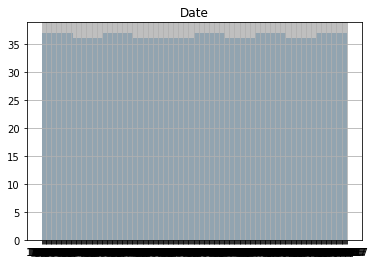

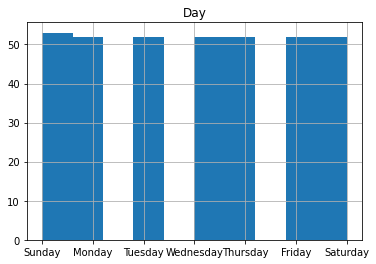

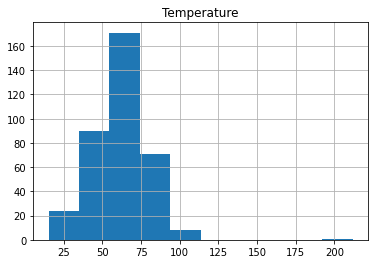

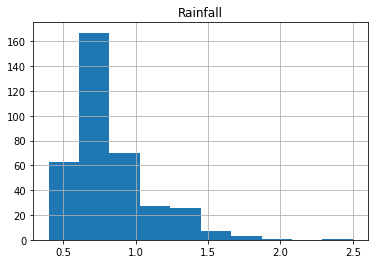

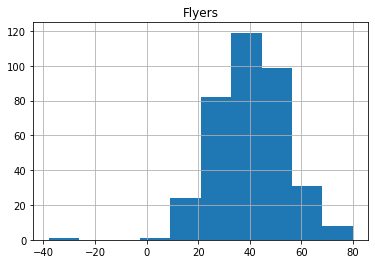

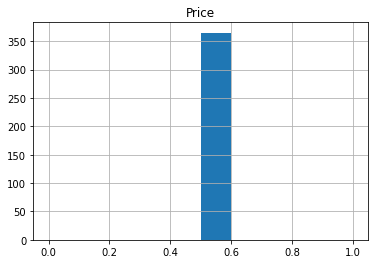

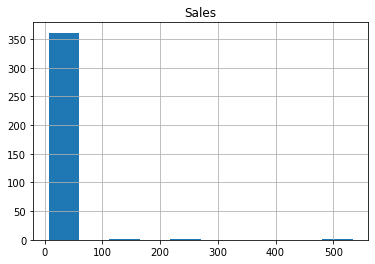

In [36]:
summarize.create_hist(df)

**For the normally distributed columns:**
- Use a 2 sigma decision rule to isolate the outliers.
- Do these make sense?
    - YES, they make sense, but only the 212 degree observation is out of range and should be removed
- Should certain outliers be kept or removed?
    - the 212 degree observation is out of range and should be removed

In [38]:
# using the empirical rule, temperature is only really normally distributed column
# maybe flyers, but there is known typo in that from above

x = df.Temperature
zscores = (x - x.mean()) / x.std()

empiricaldf = pd.DataFrame()
empiricaldf["x"] = x
empiricaldf["zscore"] = abs(zscores)

In [44]:
# Let's find all the values that are more than 2+ standard deviations from the mean
empiricaldf[zscores >= 2]

,x,zscore
41,212.0,8.336627
166,99.3,2.105251
176,102.6,2.287714
181,102.9,2.304301
190,98.0,2.033372
198,99.3,2.105251
202,99.6,2.121838
207,97.9,2.027843


In [42]:
357/365

0.9780821917808219

- Now use a 3 sigma decision rule to isolate the outliers in the normally distributed columns from lemonade.csv

